<font size=6>**Preparations**</font>  

Using the `yfinance` library to import data  
Plot the data and add moving averages  
Compute returns from prices  
___

Standard importations for this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import yfinance
plt.style.use('bmh')

In [86]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\quent\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Importing a single ticker

Use `yfinance` to import prices of the [S&P 500 Index](https://finance.yahoo.com/quote/%5EGSPC).

In [2]:
data = yfinance.download(tickers='^GSPC',
                         start='2020-01-01',
                         end='2024-12-31',
                         interval='1d',
                         multi_level_index=False
                         )

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


If you cannot use `yfinance`, load the data from an Excel file. See the section *Save the data into an Excel file*.

In [3]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
...,...,...,...,...,...
2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


## Content of the DataFrame

Print the type and shape of the variable `data` using an f-string (see a short guide [here](https://realpython.com/python-f-strings/)).

In [4]:
print(f"type is {type(data)}")
print(f"shape is {data.shape}")
print(f"length of the sample is {len(data)}")
print(f"size of the sample is {data.size}")

type is <class 'pandas.core.frame.DataFrame'>
shape is (1257, 5)
length of the sample is 1257
size of the sample is 6285


Display the first and the last elements of `data`. Note that `Date` is the index of the DataFrame.

In [5]:
data.head(3)

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000


In [6]:
data.tail(3)

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000
2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000
2024-12-30,5906.939941,5940.790039,5869.160156,5920.669922,3433250000


Extract the column `Close` of the DataFrame. What is the type of this extracted column?

In [7]:
data['Close']

Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
                 ...     
2024-12-23    5974.069824
2024-12-24    6040.040039
2024-12-26    6037.589844
2024-12-27    5970.839844
2024-12-30    5906.939941
Name: Close, Length: 1257, dtype: float64

## Check for *Not a Number* values

Use `info()` to obtain details about the DataFrame. Then check for some missing data using `isna().any()`.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [9]:
data.isna()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False
2020-01-08,False,False,False,False,False
...,...,...,...,...,...
2024-12-23,False,False,False,False,False
2024-12-24,False,False,False,False,False
2024-12-26,False,False,False,False,False


Extract all the row which contain at least one `NaN`

In [10]:
data.isna().any()

Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool

In [11]:
data[data.isna().any(axis=1)]

,Close,High,Low,Open,Volume
Date,,,,,


If necessary, delete these rows

In [12]:
data.dropna(inplace=True)

## Save the data into an Excel file

If you have an error, you may need to install the package `openpyxl`.

In [13]:
data.to_excel('SP500.xlsx')

To read the data stored in an Excel file

In [14]:
data = pd.read_excel('SP500.xlsx')
data.set_index('Date', inplace=True)
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


# Plot the data

## First plot of the data

Plot the values of the column `Close` with pandas.

In [15]:
data['Close']

Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
                 ...     
2024-12-23    5974.069824
2024-12-24    6040.040039
2024-12-26    6037.589844
2024-12-27    5970.839844
2024-12-30    5906.939941
Name: Close, Length: 1257, dtype: float64

<Axes: xlabel='Date'>

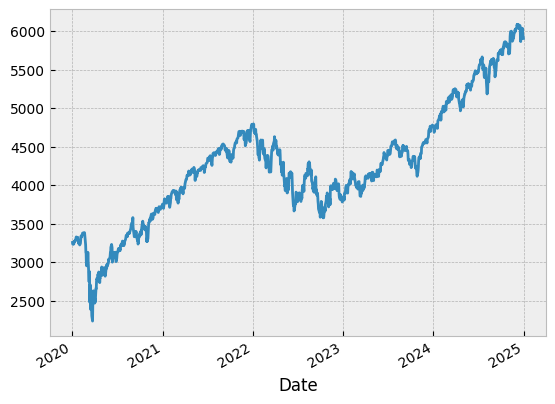

In [16]:
# We can see the axes object appear above the graph
data['Close'].plot()

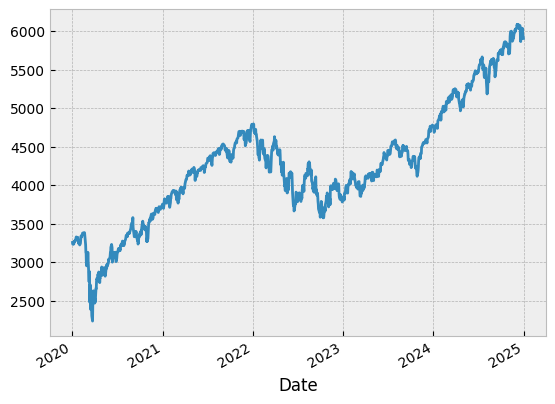

In [17]:
# Here not anymore since defined
ax = data['Close'].plot()

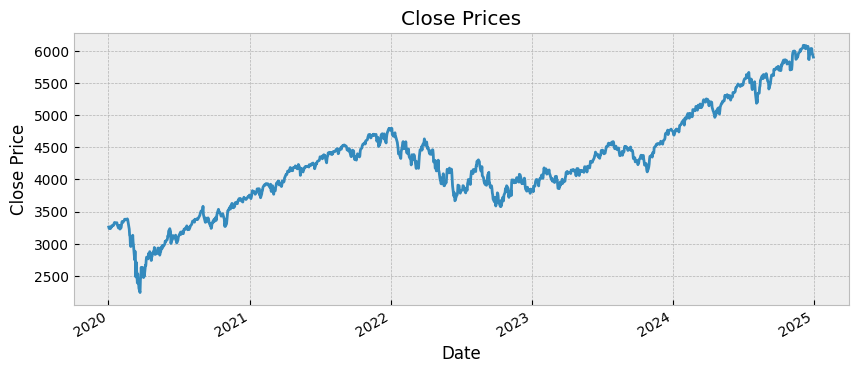

In [18]:
# Testing customization with Pandas plotting
data['Close'].plot(figsize=(10, 4))
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Plot the values of the column `Close` with matplotlib.  
In this course, I use [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to create plots.

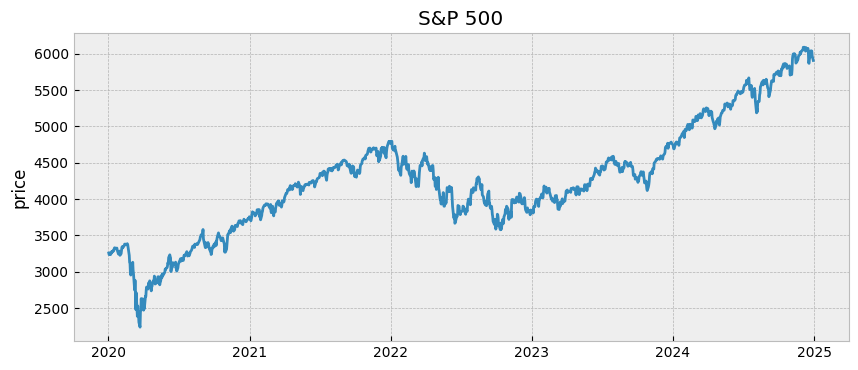

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(data['Close'])
ax.set_ylabel("price")
ax.set_title("S&P 500");

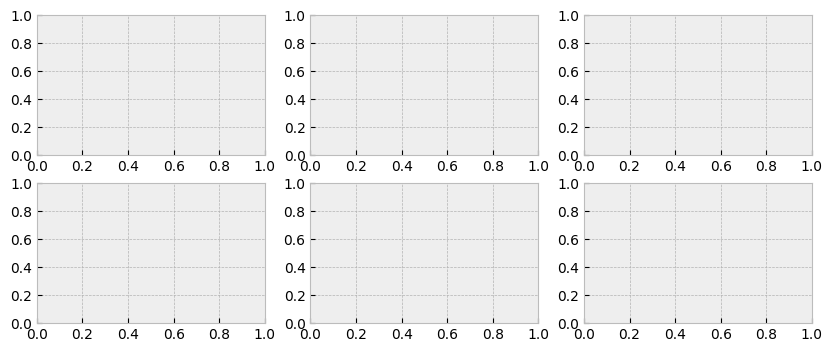

In [20]:
# Testing functionalities
fig, ax = plt.subplots(2,3,figsize=(10,4))

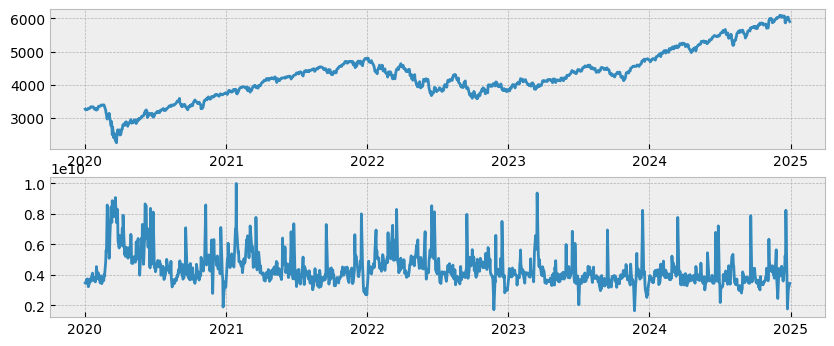

In [21]:
fig, axs = plt.subplots(2,1,figsize=(10,4))
axs[0].plot(data['Close'])
axs[1].plot(data['Volume'])

## Improve the graphs

Change the ticks on the x-axis to have custom marks 
- https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.DateFormatter  
- https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

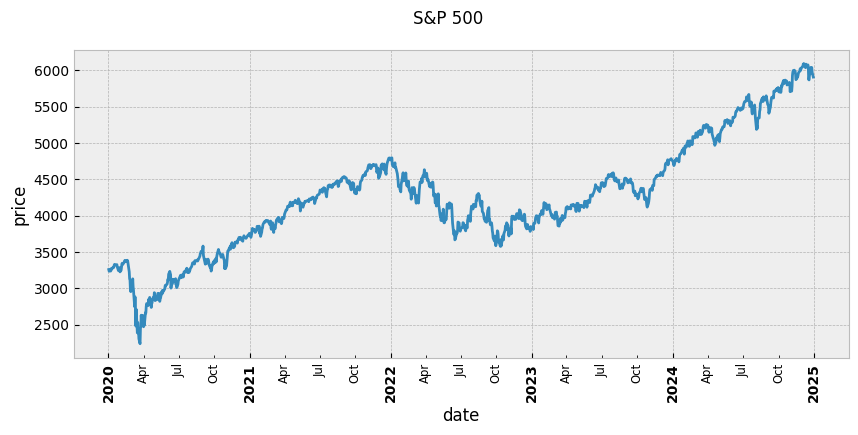

In [22]:
def format_dates_xaxis(axis):
    """
    Set major ticks every year
    Set minor ticks every quarter
    Format the dates
    """
    axis.xaxis.set_major_locator(mdates.YearLocator(1))
    axis.xaxis.set_minor_locator(mdates.MonthLocator([4, 7, 10]))
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axis.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    plt.setp(axis.get_xticklabels(), rotation=90, weight='bold')
    plt.setp(axis.get_xticklabels(minor=True), rotation=90, size='smaller')
    axis.set_xlabel("date")

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(data['Close'])
format_dates_xaxis(ax)

ax.set_ylabel("price")
fig.suptitle("S&P 500");

**Change the y-scale to logarithmic**.  
Can be obtained using `ax.set_yscale('log')` or with the built-in `semilogy()` method.

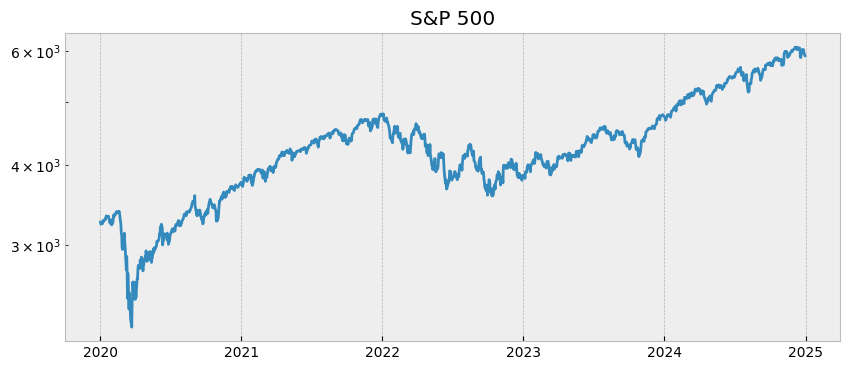

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data['Close'])
ax.set_title("S&P 500");

Define the positions and labels of the tick marks on the y-axis

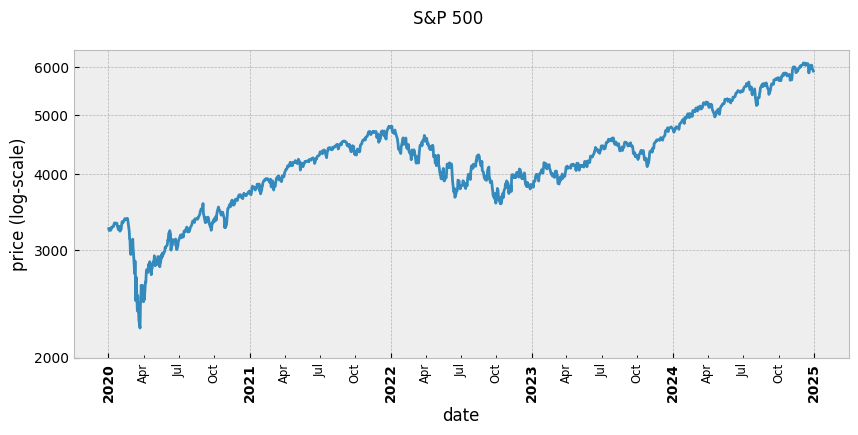

In [24]:
def format_logscale_yaxis(axis):
    """
    Change the ticks and their labels for the y axis in logscale
    """
    price_ticks = 1e3 * np.array([2, 3, 4, 5, 6])
    price_tick_labels = ['2000', '3000', '4000', '5000', '6000']
    axis.set_yticks(ticks=price_ticks)
    axis.set_yticklabels(price_tick_labels)
    axis.set_ylabel("price (log-scale)")

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data['Close'])
format_dates_xaxis(ax)
format_logscale_yaxis(ax)
fig.suptitle("S&P 500");

# Adding indicators on the graph

## Moving averages  

Use [`pandas.DataFrame.rolling`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

In [25]:
MA1 = data['Close'].rolling(65).mean()
MA2 = data['Close'].rolling(260).mean()

Add the averages on the semilog graph of the price.

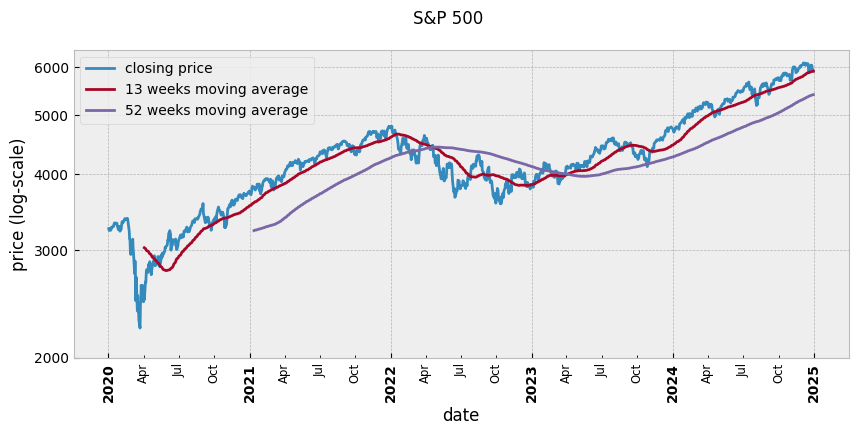

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

ax.semilogy(data['Close'], label="closing price")
ax.plot(MA1, label="13 weeks moving average")
ax.plot(MA2, label="52 weeks moving average")

format_dates_xaxis(ax)
format_logscale_yaxis(ax)

ax.legend()
fig.suptitle("S&P 500");

## Exponentially Weighted Moving Average  

<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html>  

The parameter $\alpha$ is the weight of the last observation, such that $\mathrm{EWMA}_t = \alpha x_t + (1-\alpha)\mathrm{EWMA}_{t-1}$

In [27]:
EWMA1 = data['Close'].ewm(alpha=0.05).mean()
EWMA2 = data['Close'].ewm(alpha=0.01).mean()

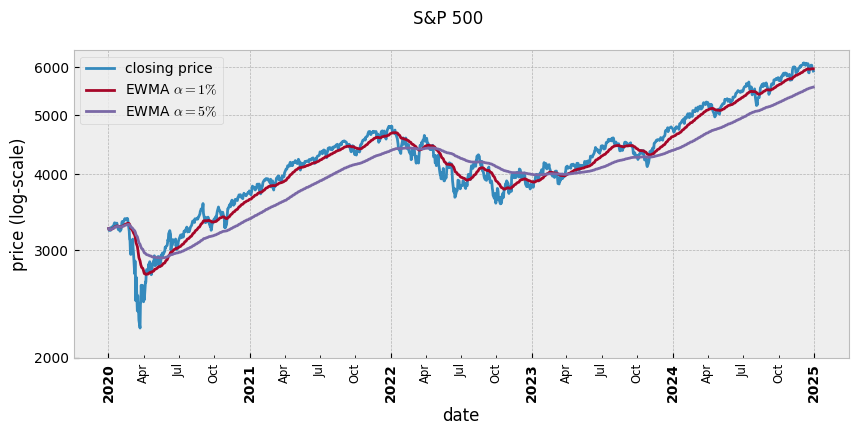

In [28]:
fig, ax = plt.subplots(figsize=(10,4))

ax.semilogy(data['Close'], label="closing price")
ax.plot(EWMA1, label=r"EWMA $\alpha=1\%$")
ax.plot(EWMA2, label=r"EWMA $\alpha=5\%$")

format_dates_xaxis(ax)
format_logscale_yaxis(ax)

ax.legend()
fig.suptitle("S&P 500");

Compare Simple MA and EWMA on the same graph.

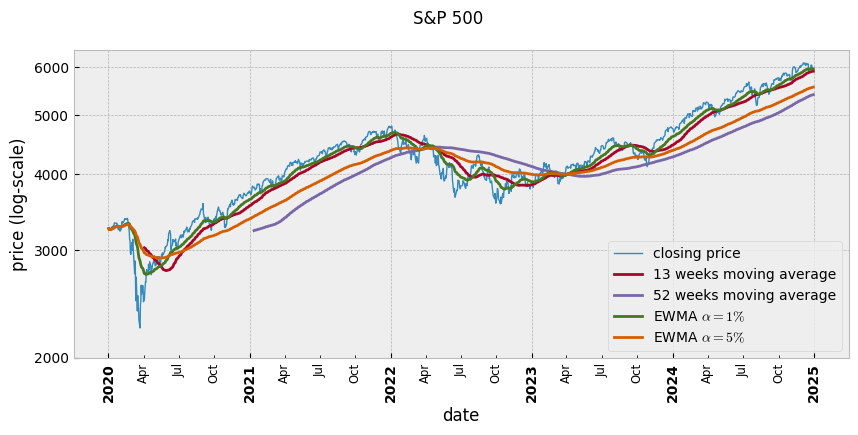

In [29]:
fig, ax = plt.subplots(figsize=(10,4))

ax.semilogy(data['Close'], label="closing price", lw=1)
ax.plot(MA1, label="13 weeks moving average")
ax.plot(MA2, label="52 weeks moving average")
ax.plot(EWMA1, label=r"EWMA $\alpha=1\%$")
ax.plot(EWMA2, label=r"EWMA $\alpha=5\%$")

format_dates_xaxis(ax)
format_logscale_yaxis(ax)

ax.legend()
fig.suptitle("S&P 500");

## Volume

- Create two subplots with `plt.subplots()`  
 <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html>
- and plot the price and the volume using `stackplot()`. There are other ploting functions that could be used here such as `bar()` or `stem()`.  
 https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stackplot.html

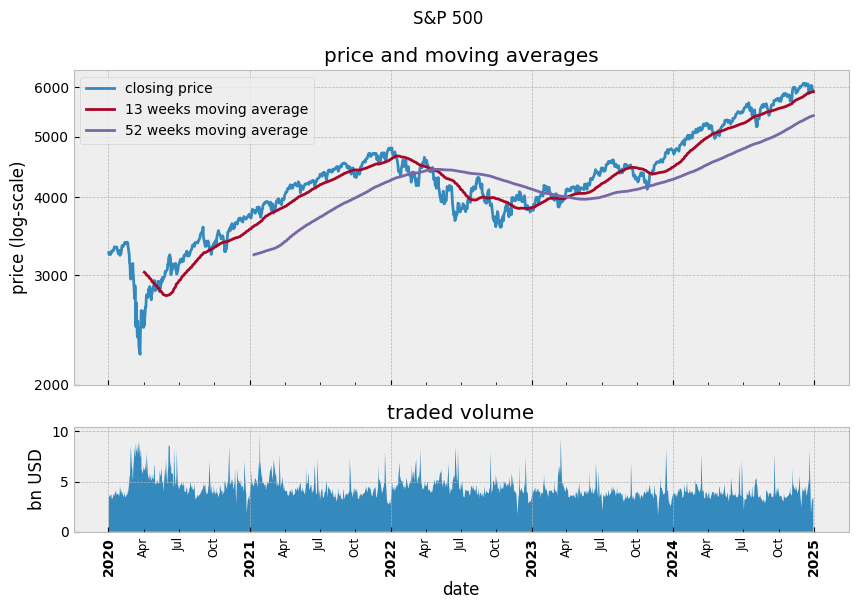

In [30]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6),
                               gridspec_kw={'height_ratios': [3, 1]},
                               sharex=True)

ax1.semilogy(data['Close'], label="closing price")
ax1.plot(MA1, label="13 weeks moving average")
ax1.plot(MA2, label="52 weeks moving average")
format_logscale_yaxis(ax1)
ax1.set_title("price and moving averages")

ax2.stackplot(data.index, data['Volume']/1e9)
format_dates_xaxis(ax2)
ax2.set_ylabel("bn USD")
ax2.set_title("traded volume")

ax1.legend()

fig.suptitle("S&P 500");

# Returns

Compute the returns over a period of `offset` days.

In [31]:
offset = 1
returns = data['Close'].pct_change(offset)

Plot the returns on a second subplot below the price.

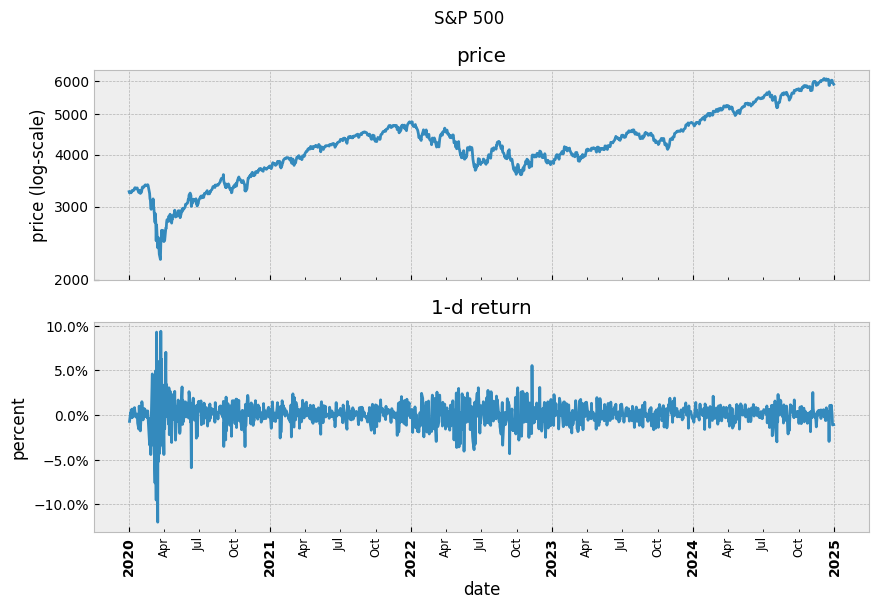

In [32]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6), sharex=True)

ax1.semilogy(data['Close'], label="closing price")
ax2.plot(returns)

format_logscale_yaxis(ax1)
format_dates_xaxis(ax2)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

ax2.set_ylabel("percent")
ax1.set_title("price")
ax2.set_title(f"{offset}-d return")

fig.suptitle("S&P 500");

## Arithmetic and log returns

Compute the arithmetic and log returns

In [33]:
ret_arit = data['Close'].pct_change(offset)
ret_log = np.log(data['Close']) - np.log(data['Close'].shift(1))

Comparison of arithmetic and log returns

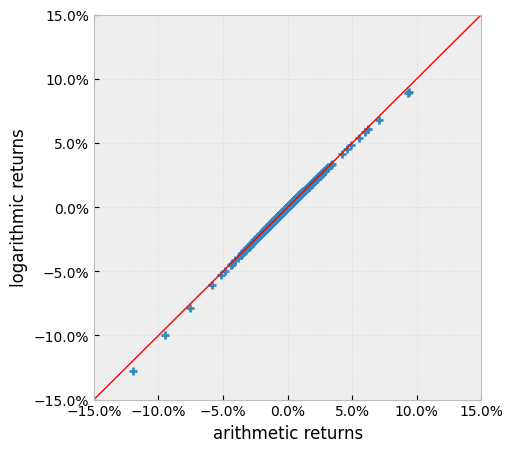

In [34]:
max_absolute_return = 0.15

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(ret_arit, ret_log, marker='+')
ax.plot([-max_absolute_return, max_absolute_return], [-max_absolute_return, max_absolute_return], c='r', lw=1)
ax.set_xlabel('arithmetic returns')
ax.set_ylabel('logarithmic returns')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xlim([-max_absolute_return, max_absolute_return])
ax.set_ylim([-max_absolute_return, max_absolute_return])
ax.grid(alpha=0.25);

# Exercise

Starting from the graph with moving averages and volume, add a third subplot with the **1 year Momentum** defined as  
Momentum = Price(today) - Price(1 year ago).

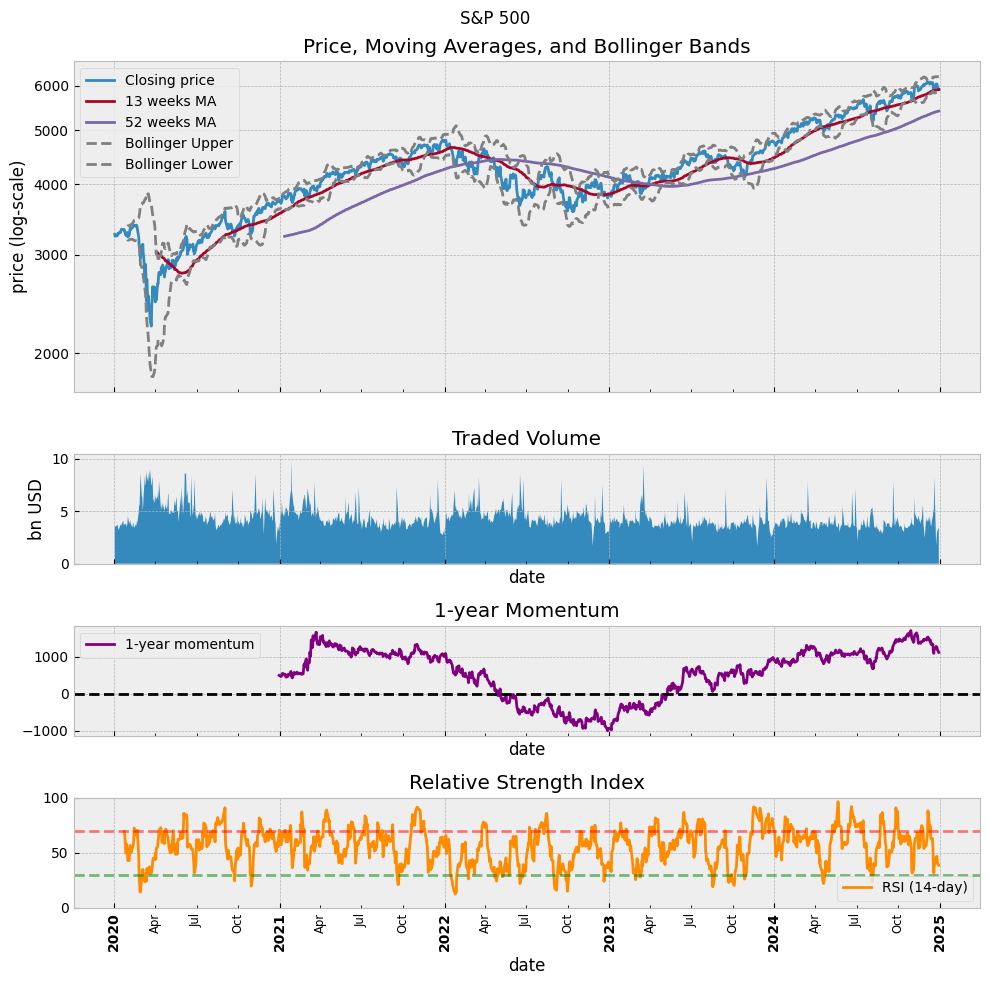

In [35]:
# --- 1) Compute 1-year momentum: Price(today) - Price(1 year ago) ---
momentum = data['Close'] - data['Close'].shift(252) # for daily data, ~252 trading days in a year

# --- 2) Compute RSI (14-day) ---
window_length = 14
delta = data['Close'].diff()

# separate positive (gains) and negative (losses)
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# calculate rolling means
avg_gain = gain.rolling(window_length).mean()
avg_loss = loss.rolling(window_length).mean()

# relative Strength (RS) and RSI
rs = avg_gain / avg_loss
rsi = 100.0 - (100.0 / (1.0 + rs))

# --- 3) Compute Bollinger Bands (20-day window, 2 standard deviations) ---
bb_window = 20
rolling_mean = data['Close'].rolling(window=bb_window).mean()
rolling_std = data['Close'].rolling(window=bb_window).std()
upper_band = rolling_mean + 3 * rolling_std
lower_band = rolling_mean - 3 * rolling_std

# --- 4) Create 4 subplots, sharing the same x-axis ---
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    4, 
    figsize=(10, 10),
    gridspec_kw={'height_ratios': [3, 1, 1, 1]},
    sharex=True
)

# ========== Subplot 1: Price, Moving Averages, and Bollinger Bands ==========
ax1.semilogy(data['Close'], label="Closing price")
ax1.plot(MA1, label="13 weeks MA")
ax1.plot(MA2, label="52 weeks MA")
ax1.plot(upper_band, label="Bollinger Upper", color="gray", linestyle="--")
ax1.plot(lower_band, label="Bollinger Lower", color="gray", linestyle="--")
format_logscale_yaxis(ax1)
ax1.set_title("Price, Moving Averages, and Bollinger Bands")
ax1.legend()

# ========== Subplot 2: Traded Volume ==========
ax2.stackplot(data.index, data['Volume']/1e9)
format_dates_xaxis(ax2)
ax2.set_ylabel("bn USD")
ax2.set_title("Traded Volume")

# ========== Subplot 3: 1-year Momentum ==========
ax3.plot(momentum, label="1-year momentum", color="purple")
ax3.axhline(0, color='black', linestyle='--')  # Reference line
ax3.set_title("1-year Momentum")
format_dates_xaxis(ax3)
ax3.legend()

# ========== Subplot 4: RSI ==========
ax4.plot(rsi, label='RSI (14-day)', color='darkorange')
ax4.axhline(70, color='red', linestyle='--', alpha=0.5)
ax4.axhline(30, color='green', linestyle='--', alpha=0.5)
ax4.set_ylim([0, 100])
ax4.set_title("Relative Strength Index")
format_dates_xaxis(ax4)
ax4.legend()

fig.suptitle("S&P 500")
plt.tight_layout()
plt.show()

# Importing multiple tickers

In [41]:
tickers_list = 'SPY BLV VCSH VCLT GSG'
tickers_to_names = {'SPY': 'SP500',       # SPDR S&P 500 ETF Trust
                    'BLV': 'Bond',        # Vanguard Long-Term Bond Fund
                    'VCSH': 'CorpBondST', # Vanguard Short-Term Corporate Bond Index Fund ETF Shares
                    'VCLT': 'CorpBondLT', # Vanguard Long-Term Corporate Bond Index Fund ETF Shares
                    'GSG': 'Commo',       # iShares S&P GSCI Commodity-Indexed Trust
                   }

In [42]:
data = yfinance.download(tickers=tickers_list,
                         start='2020-01-01',
                         end='2024-12-31',
                         interval='1d',
                         group_by='column'
                         )
data.head().round(2)

[*********************100%***********************]  5 of 5 completed


Price       Close                                High                        \
Ticker        BLV    GSG     SPY   VCLT   VCSH    BLV    GSG     SPY   VCLT   
Date                                                                          
2020-01-02  80.37  16.29  301.19  82.23  70.52  80.68  16.39  301.21  82.62   
2020-01-03  81.23  16.51  298.91  82.81  70.62  81.27  16.61  300.05  82.87   
2020-01-06  80.80  16.51  300.05  82.45  70.67  81.58  16.61  300.14  83.06   
2020-01-07  80.48  16.46  299.21  82.03  70.59  80.79  16.50  299.96  82.35   
2020-01-08  80.13  16.15  300.81  81.73  70.55  80.80  16.45  302.04  82.35   

Price              ...   Open                                Volume           \
Ticker       VCSH  ...    BLV    GSG     SPY   VCLT   VCSH      BLV      GSG   
Date               ...                                                         
2020-01-02  70.57  ...  80.21  16.39  299.96  82.33  70.53  2145300  1537500   
2020-01-03  70.63  ...  80.70  16.54  297.76  82.54  70.57  1874300   429100   
2020-01-06  70.67  ...  81.35  16.61  297.13  83.01  70.65   654300   280500   
2020-01-07  70.63  ...  80.70  16.43  299.48  82.24  70.63   635900   255300   
2020-01-08  70.63  ...  80.55  16.44  299.41  82.11  70.62   575000   835000   

Price                                  
Ticker           SPY    VCLT     VCSH  
Date                                   
2020-01-02  59151200  466000  2575000  
2020-01-03  77709700  540800  1224200  
2020-01-06  55653900  580100  2032400  
2020-01-07  40496400  220800  1093100  
2020-01-08  68296000  327000  1390400  

[5 rows x 25 columns]

Note that the column index is a *MultiIndex* with two levels.\
Rename the columns using the *dictionary* `tickers_to_names`. Which level of the *MultiIndex* is concerned?

In [4]:
type(tickers_to_names)

dict

In [43]:
data.rename(columns=tickers_to_names, level=1, inplace=True)
data.head().round(2)

Price       Close                                        High                 \
Ticker       Bond  Commo   SP500 CorpBondLT CorpBondST   Bond  Commo   SP500   
Date                                                                           
2020-01-02  80.37  16.29  301.19      82.23      70.52  80.68  16.39  301.21   
2020-01-03  81.23  16.51  298.91      82.81      70.62  81.27  16.61  300.05   
2020-01-06  80.80  16.51  300.05      82.45      70.67  81.58  16.61  300.14   
2020-01-07  80.48  16.46  299.21      82.03      70.59  80.79  16.50  299.96   
2020-01-08  80.13  16.15  300.81      81.73      70.55  80.80  16.45  302.04   

Price                             ...   Open                            \
Ticker     CorpBondLT CorpBondST  ...   Bond  Commo   SP500 CorpBondLT   
Date                              ...                                    
2020-01-02      82.62      70.57  ...  80.21  16.39  299.96      82.33   
2020-01-03      82.87      70.63  ...  80.70  16.54  297.76      82.54   
2020-01-06      83.06      70.67  ...  81.35  16.61  297.13      83.01   
2020-01-07      82.35      70.63  ...  80.70  16.43  299.48      82.24   
2020-01-08      82.35      70.63  ...  80.55  16.44  299.41      82.11   

Price                   Volume                                           
Ticker     CorpBondST     Bond    Commo     SP500 CorpBondLT CorpBondST  
Date                                                                     
2020-01-02      70.53  2145300  1537500  59151200     466000    2575000  
2020-01-03      70.57  1874300   429100  77709700     540800    1224200  
2020-01-06      70.65   654300   280500  55653900     580100    2032400  
2020-01-07      70.63   635900   255300  40496400     220800    1093100  
2020-01-08      70.62   575000   835000  68296000     327000    1390400  

[5 rows x 25 columns]

## Multi Index

Extract the `Close` columns for all tickers.

In [44]:
historical_data = data['Close']
historical_data.tail().round(3)

Ticker,Bond,Commo,SP500,CorpBondLT,CorpBondST
Date,,,,,
2024-12-23,67.988,21.28,594.69,74.159,77.247
2024-12-24,68.211,21.39,601.30,74.521,77.326
2024-12-26,68.231,21.34,601.34,74.581,77.376
2024-12-27,67.745,21.42,595.01,74.046,77.336
2024-12-30,68.201,21.66,588.22,74.452,77.475


## Exercises with the multiindex

Same using the `.loc` method of the DataFrame.\
<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html>

In [45]:
data.loc[:,'Close'].round(4)

Ticker,Bond,Commo,SP500,CorpBondLT,CorpBondST
Date,,,,,
2020-01-02,80.3654,16.29,301.1949,82.2280,70.5198
2020-01-03,81.2259,16.51,298.9142,82.8104,70.6155
2020-01-06,80.8036,16.51,300.0545,82.4464,70.6677
2020-01-07,80.4849,16.46,299.2108,82.0339,70.5894
2020-01-08,80.1343,16.15,300.8055,81.7266,70.5459
...,...,...,...,...,...
2024-12-23,67.9878,21.28,594.6900,74.1586,77.2470
2024-12-24,68.2111,21.39,601.3000,74.5215,77.3265
2024-12-26,68.2310,21.34,601.3400,74.5809,77.3761


Extract two columns: `Close` and `Volume`

In [46]:
data.loc[:,['Close','Volume']].round(4)

Price         Close                                          Volume           \
Ticker         Bond  Commo     SP500 CorpBondLT CorpBondST     Bond    Commo   
Date                                                                           
2020-01-02  80.3654  16.29  301.1949    82.2280    70.5198  2145300  1537500   
2020-01-03  81.2259  16.51  298.9142    82.8104    70.6155  1874300   429100   
2020-01-06  80.8036  16.51  300.0545    82.4464    70.6677   654300   280500   
2020-01-07  80.4849  16.46  299.2108    82.0339    70.5894   635900   255300   
2020-01-08  80.1343  16.15  300.8055    81.7266    70.5459   575000   835000   
...             ...    ...       ...        ...        ...      ...      ...   
2024-12-23  67.9878  21.28  594.6900    74.1586    77.2470   722500   112300   
2024-12-24  68.2111  21.39  601.3000    74.5215    77.3265   465200    57400   
2024-12-26  68.2310  21.34  601.3400    74.5809    77.3761   694000    89600   
2024-12-27  67.7446  21.42  595.0100    74.0455    77.3364   876000   142400   
2024-12-30  68.2012  21.66  588.2200    74.4520    77.4754  2319500   517300   

Price                                       
Ticker         SP500 CorpBondLT CorpBondST  
Date                                        
2020-01-02  59151200     466000    2575000  
2020-01-03  77709700     540800    1224200  
2020-01-06  55653900     580100    2032400  
2020-01-07  40496400     220800    1093100  
2020-01-08  68296000     327000    1390400  
...              ...        ...        ...  
2024-12-23  57635800    1646500    1699000  
2024-12-24  33160100    1122500     906800  
2024-12-26  41219100    2380400    1456300  
2024-12-27  64969300    1853700    2563500  
2024-12-30  56578800    1464300    1697700  

[1257 rows x 10 columns]

**Second level of the multiindex**

Use a slicer: [pandas.IndexSlice](https://pandas.pydata.org/docs/reference/api/pandas.IndexSlice.html)

In [48]:
idx = pd.IndexSlice
data.loc[:, idx[:, 'SP500']]

Price,Close,High,Low,Open,Volume
Ticker,SP500,SP500,SP500,SP500,SP500
Date,,,,,
2020-01-02,301.194916,301.213476,299.025448,299.961853,59151200
2020-01-03,298.914185,300.054558,297.699654,297.755279,77709700
2020-01-06,300.054535,300.137973,297.013540,297.134071,55653900
2020-01-07,299.210846,299.961814,298.756536,299.479692,40496400
2020-01-08,300.805481,302.038544,299.155201,299.405514,68296000
...,...,...,...,...,...
2024-12-23,594.690002,595.299988,587.659973,590.890015,57635800
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100


In [49]:
data.loc[:, idx[:, 'SP500']].droplevel(1, axis=1)

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,301.194916,301.213476,299.025448,299.961853,59151200
2020-01-03,298.914185,300.054558,297.699654,297.755279,77709700
2020-01-06,300.054535,300.137973,297.013540,297.134071,55653900
2020-01-07,299.210846,299.961814,298.756536,299.479692,40496400
2020-01-08,300.805481,302.038544,299.155201,299.405514,68296000
...,...,...,...,...,...
2024-12-23,594.690002,595.299988,587.659973,590.890015,57635800
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100
2024-12-26,601.340027,602.479980,598.080017,599.500000,41219100


In [50]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [51]:
data.loc[idx['2022':'2023'], idx[['Close', 'Volume'], ['SP500', 'Bond']]]

Price            Close                Volume        
Ticker           SP500       Bond      SP500    Bond
Date                                                
2022-01-03  457.181610  88.342010   72668200  937700
2022-01-04  457.028503  88.053772   71178700  426300
2022-01-05  448.252533  87.625778  104538900  652600
2022-01-06  447.831451  87.573372   86858900  319900
2022-01-07  446.060944  86.996887   85111600  240600
...                ...        ...        ...     ...
2023-12-22  467.651306  70.102684   67126600  696700
2023-12-26  469.625946  70.301201   55387000  687600
2023-12-27  470.475067  71.350471   68000300  693700
2023-12-28  470.652771  70.972366   77158100  474100
2023-12-29  469.290283  70.499702  122234100  482900

[501 rows x 4 columns]

## Checking for missing data

Check if some data is missing

In [52]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bond        1257 non-null   float64
 1   Commo       1257 non-null   float64
 2   SP500       1257 non-null   float64
 3   CorpBondLT  1257 non-null   float64
 4   CorpBondST  1257 non-null   float64
dtypes: float64(5)
memory usage: 91.2 KB


In [53]:
historical_data.isna().any()

Ticker
Bond          False
Commo         False
SP500         False
CorpBondLT    False
CorpBondST    False
dtype: bool

In [54]:
historical_data.to_excel('hist_data.xlsx')

## Relative performance

In [55]:
historical_data.head(3)

Ticker,Bond,Commo,SP500,CorpBondLT,CorpBondST
Date,,,,,
2020-01-02,80.365364,16.290001,301.194916,82.228043,70.519806
2020-01-03,81.225914,16.510000,298.914185,82.810379,70.615547
2020-01-06,80.803627,16.510000,300.054535,82.446434,70.667717


In [56]:
historical_data.iloc[0]

Ticker
Bond           80.365364
Commo          16.290001
SP500         301.194916
CorpBondLT     82.228043
CorpBondST     70.519806
Name: 2020-01-02 00:00:00, dtype: float64

In [57]:
rel_perf = 100 * historical_data / historical_data.iloc[0]

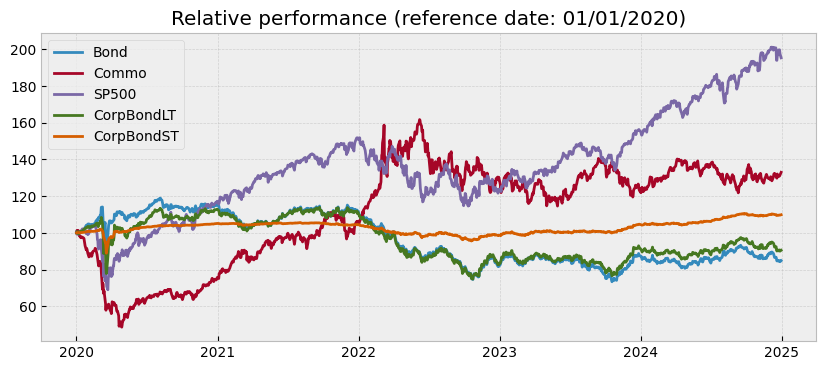

In [58]:
fig, ax = plt.subplots(figsize=(10,4))
for asset in rel_perf.columns:
    ax.plot(rel_perf[asset], label=asset)
ax.grid(alpha=0.5)
ax.set_title("Relative performance (reference date: 01/01/2020)")
ax.legend();

## Returns

In [59]:
returns = data['Close'].pct_change().dropna()

In [52]:
returns.columns

Index(['Bond', 'Commo', 'SP500', 'CorpBondLT', 'CorpBondST'], dtype='object', name='Ticker')

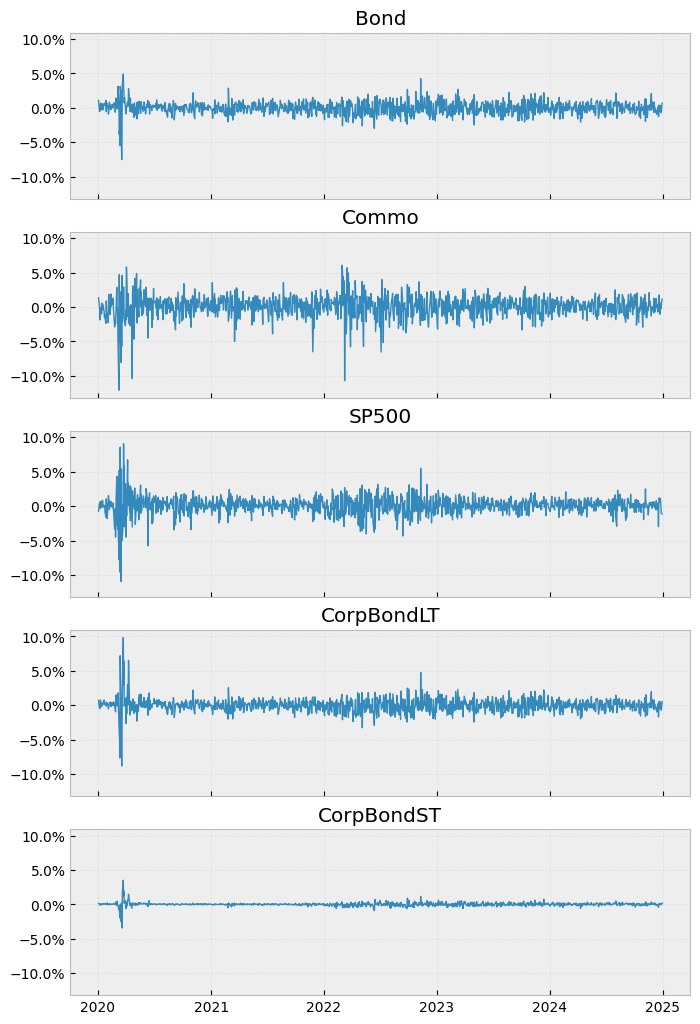

In [60]:
n_plots = len(returns.columns)
fig, axs = plt.subplots(n_plots, figsize=(8,n_plots*2.5), sharex=True, sharey=True)
for ax, asset in zip(axs, returns.columns):
    ax.plot(returns[asset], lw=1, label=asset)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax.grid(alpha=0.25)
    ax.set_title(asset)

In [61]:
returns.describe()

Ticker,Bond,Commo,SP500,CorpBondLT,CorpBondST
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,-0.000088,0.000351,0.000621,-0.000027,0.000079
std,0.009209,0.015689,0.013232,0.010239,0.002786
min,-0.075169,-0.120811,-0.109424,-0.088222,-0.034320
25%,-0.005380,-0.007397,-0.005150,-0.004745,-0.000729
50%,0.000475,0.001392,0.000903,0.000241,0.000120
75%,0.005197,0.008913,0.007326,0.005181,0.000896
max,0.049138,0.060548,0.090603,0.098215,0.035083


In [62]:
returns.to_excel('returns.xlsx')